# *Workshop: Sturdy-Octo-Disco-Adding-Sunglasses-for-a-Cool-New-Look* #
### *NAME:* *NITHYA D* ###
### *REGISTER NUMBER:* *212223240110* ###

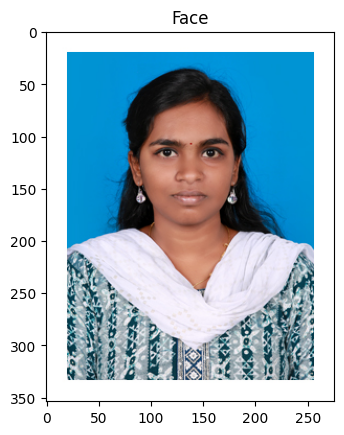

Resized Sunglasses Dimension = (85, 125, 4)


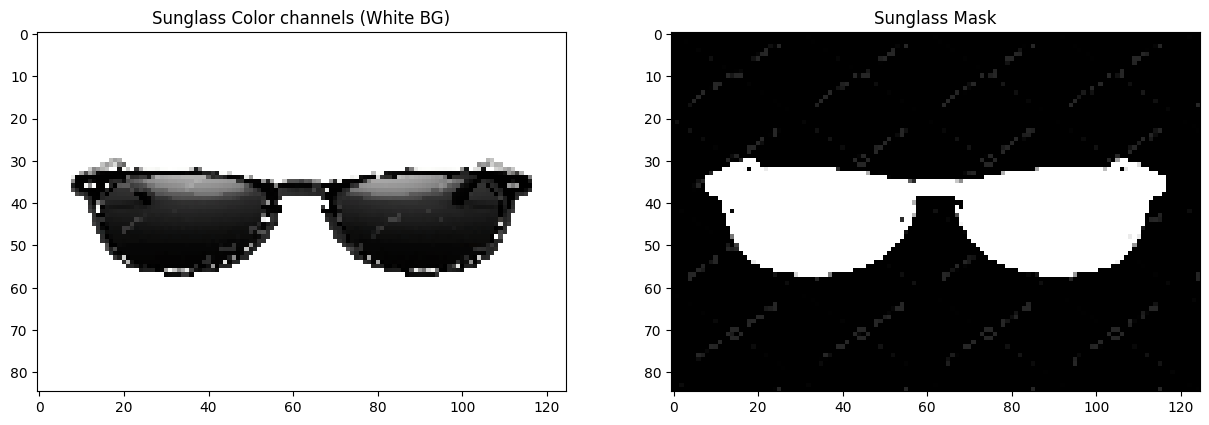

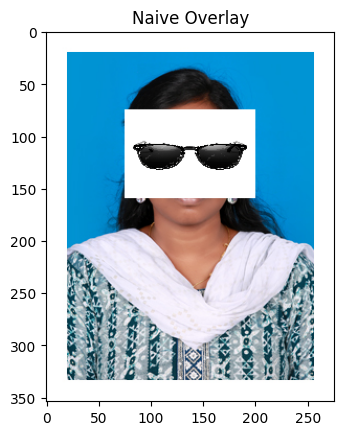

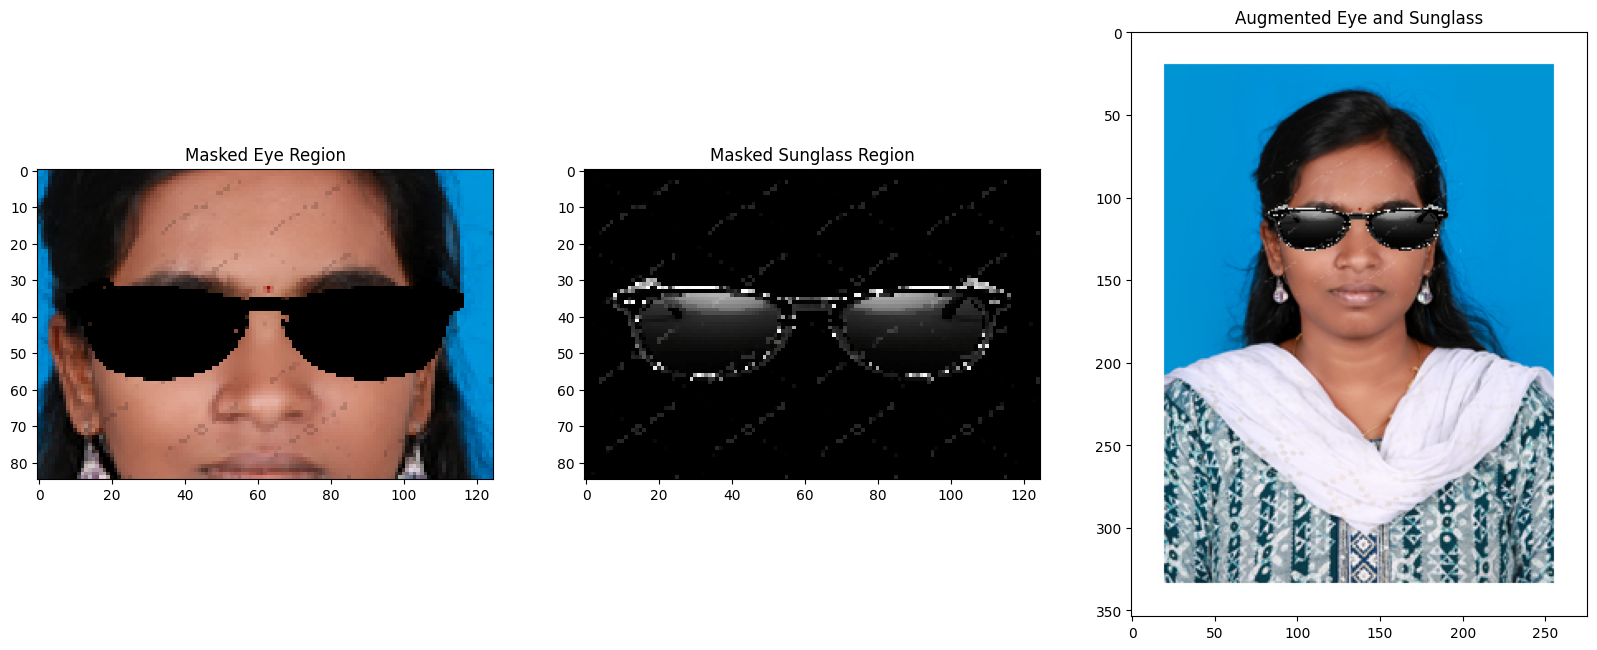

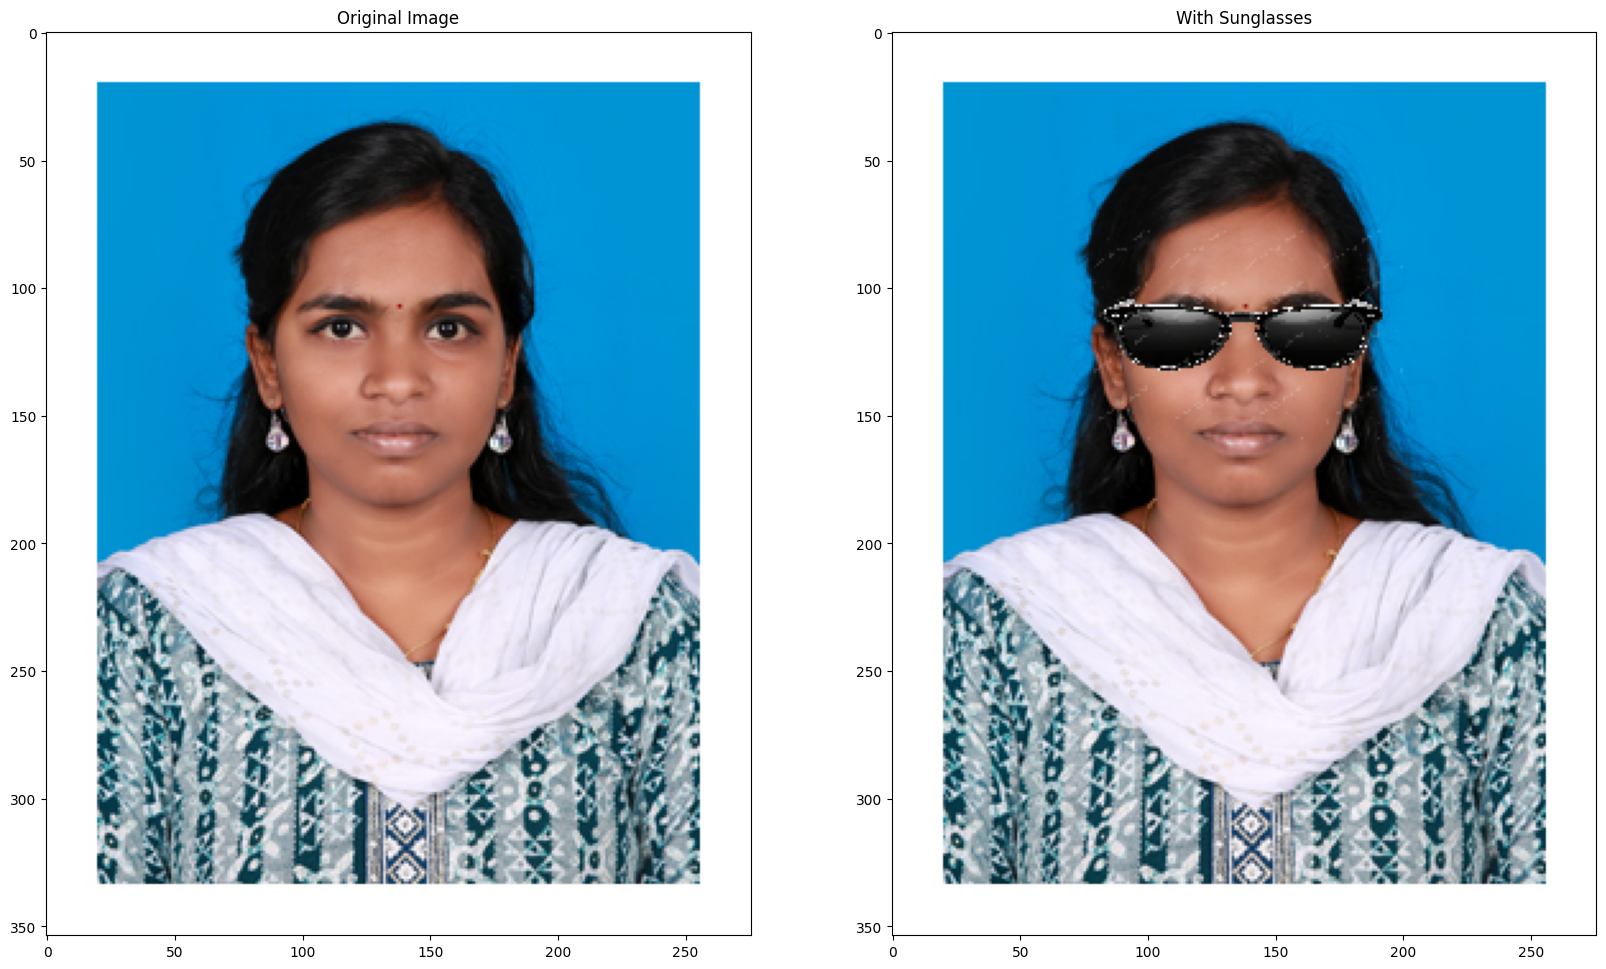

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
faceImage = cv2.imread('C11791.jpg')
plt.imshow(faceImage[:,:,::-1]); plt.title("Face"); plt.show()
glassPNG = cv2.imread('sunglass.png', cv2.IMREAD_UNCHANGED)
y1, y2 = 75, 160
x1, x2 = 75, 200
roi_height = y2 - y1
roi_width = x2 - x1
glassPNG = cv2.resize(glassPNG, (roi_width, roi_height))
print("Resized Sunglasses Dimension = {}".format(glassPNG.shape))
if glassPNG.shape[2] == 4:  
    glassBGR, glassMask1 = glassPNG[:,:,:3], glassPNG[:,:,3]  
    inv_mask = cv2.bitwise_not(glassMask1)  
    glassBGR = cv2.add(
        cv2.bitwise_and(glassBGR, glassBGR, mask=glassMask1),
        cv2.bitwise_and(np.full_like(glassBGR, 255), np.full_like(glassBGR, 255), mask=inv_mask)
    )
else:  
    glassBGR = glassPNG  
    _, glassMask1 = cv2.threshold(cv2.cvtColor(glassBGR, cv2.COLOR_BGR2GRAY), 10, 255, cv2.THRESH_BINARY)  
plt.figure(figsize=[15,15])
plt.subplot(121); plt.imshow(glassBGR[:,:,::-1]); plt.title('Sunglass Color channels (White BG)')
plt.subplot(122); plt.imshow(glassMask1, cmap='gray'); plt.title('Sunglass Mask')
plt.show()
faceWithGlassesNaive = faceImage.copy()
faceWithGlassesNaive[y1:y2, x1:x2] = glassBGR
plt.imshow(faceWithGlassesNaive[...,::-1]); plt.title("Naive Overlay"); plt.show()
glassMask = cv2.merge((glassMask1, glassMask1, glassMask1))
glassMask = glassMask.astype(float) / 255.0
faceWithGlassesArithmetic = faceImage.copy()
eyeROI = faceWithGlassesArithmetic[y1:y2, x1:x2].astype(float)
maskedEye = (eyeROI * (1 - glassMask))
maskedGlass = (glassBGR.astype(float) * glassMask)
eyeRoiFinal = maskedEye + maskedGlass
faceWithGlassesArithmetic[y1:y2, x1:x2] = np.uint8(eyeRoiFinal)
plt.figure(figsize=[20,20])
plt.subplot(131); plt.imshow(maskedEye.astype(np.uint8)[...,::-1]); plt.title("Masked Eye Region")
plt.subplot(132); plt.imshow(maskedGlass.astype(np.uint8)[...,::-1]); plt.title("Masked Sunglass Region")
plt.subplot(133); plt.imshow(faceWithGlassesArithmetic[:,:,::-1]); plt.title("Augmented Eye and Sunglass")
plt.show()
plt.figure(figsize=[20,20])
plt.subplot(121); plt.imshow(faceImage[:,:,::-1]); plt.title("Original Image")
plt.subplot(122); plt.imshow(faceWithGlassesArithmetic[:,:,::-1]); plt.title("With Sunglasses")
plt.show()